In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True, linewidth=120)

In [32]:
# 파일 불러오기
dta = pd.read_excel('/home/ekim_reverse/PyCode/study/Python.study/toy_project/online_news_D1_re.xlsx')

In [33]:
dta.head()

,Date,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,...,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
0,2015-01-01,-0.000040,-0.000027,-0.000046,-0.000059,-0.000049,-4.951829e-06,-7.097621e-06,-0.000043,-0.000064,...,-3.466280e-06,-0.000021,-0.000022,-0.000016,-0.000038,-0.000057,-0.000018,-0.000010,-0.000007,-9.738596e-06
1,2015-01-02,-0.000006,-0.000007,-0.000010,-0.000011,-0.000017,-9.154635e-07,-3.923415e-07,-0.000005,-0.000012,...,-2.615610e-07,-0.000004,-0.000006,-0.000003,-0.000009,-0.000005,-0.000006,-0.000005,-0.000002,-7.410895e-07
2,2015-01-03,0.000046,0.000044,0.000053,0.000051,0.000062,1.062383e-05,1.239447e-05,0.000039,0.000078,...,0.000000e+00,0.000048,0.000025,0.000035,0.000050,0.000041,0.000046,0.000019,0.000012,7.082554e-06
3,2015-01-04,-0.000099,-0.000150,-0.000116,-0.000106,-0.000208,-4.820419e-05,-4.686519e-06,-0.000029,-0.000159,...,-5.356021e-06,-0.000038,-0.000055,-0.000073,-0.000109,-0.000028,-0.000098,-0.000040,-0.000032,-1.205105e-05
4,2015-01-05,0.000163,0.000161,0.000159,0.000214,0.000290,4.499154e-05,9.748167e-06,0.000049,0.000316,...,1.274760e-05,0.000073,0.000116,0.000110,0.000176,0.000072,0.000135,0.000077,0.000021,3.449352e-05


In [4]:
dta.max()

date        2019-10-02 00:00:00
topic_0                 26.6496
topic_1                 63.2485
topic_2                 2.03698
topic_3                 8.43301
                   ...         
topic_75               0.670358
topic_76                1.42625
topic_77                6.03042
topic_78               0.725198
topic_79                2.37789
Length: 81, dtype: object

In [6]:
# 그래프로 확인하기
dta.loc[:, 'topic0':'topic19'].plot(subplots=True, figsize=(15, 50));

KeyError: 'topic0'

In [34]:
# 열 이름 변경
dta = dta.rename(columns={'Unnamed: 0':'Date'}) 

In [35]:
# index 이름 변경
dta = dta.set_index("Date")

In [36]:
dta

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,-0.000040,-0.000027,-0.000046,-0.000059,-0.000049,-4.951829e-06,-7.097621e-06,-0.000043,-0.000064,-0.000038,-3.466280e-06,-0.000021,-0.000022,-0.000016,-0.000038,-0.000057,-0.000018,-0.000010,-0.000007,-9.738596e-06
2015-01-02,-0.000006,-0.000007,-0.000010,-0.000011,-0.000017,-9.154635e-07,-3.923415e-07,-0.000005,-0.000012,-0.000013,-2.615610e-07,-0.000004,-0.000006,-0.000003,-0.000009,-0.000005,-0.000006,-0.000005,-0.000002,-7.410895e-07
2015-01-03,0.000046,0.000044,0.000053,0.000051,0.000062,1.062383e-05,1.239447e-05,0.000039,0.000078,0.000071,0.000000e+00,0.000048,0.000025,0.000035,0.000050,0.000041,0.000046,0.000019,0.000012,7.082554e-06
2015-01-04,-0.000099,-0.000150,-0.000116,-0.000106,-0.000208,-4.820419e-05,-4.686519e-06,-0.000029,-0.000159,-0.000081,-5.356021e-06,-0.000038,-0.000055,-0.000073,-0.000109,-0.000028,-0.000098,-0.000040,-0.000032,-1.205105e-05
2015-01-05,0.000163,0.000161,0.000159,0.000214,0.000290,4.499154e-05,9.748167e-06,0.000049,0.000316,0.000157,1.274760e-05,0.000073,0.000116,0.000110,0.000176,0.000072,0.000135,0.000077,0.000021,3.449352e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,-0.000092,-0.000055,-0.000031,-0.000101,-0.000109,-1.153380e-05,-1.043534e-05,-0.000018,-0.000079,-0.000056,-4.393828e-06,-0.000032,-0.000058,-0.000041,-0.000051,-0.000029,-0.000047,-0.000020,-0.000012,-1.153380e-05
2016-12-20,0.000050,0.000076,0.000057,0.000111,0.000125,1.827463e-05,6.429961e-06,0.000023,0.000089,0.000085,4.399447e-06,0.000056,0.000068,0.000053,0.000077,0.000020,0.000082,0.000031,0.000020,1.150625e-05
2016-12-21,-0.000031,-0.000020,-0.000037,-0.000044,-0.000033,-4.641636e-06,-6.614332e-06,-0.000019,-0.000052,-0.000037,-1.160409e-06,-0.000015,-0.000019,-0.000013,-0.000032,-0.000014,-0.000014,-0.000006,-0.000008,-1.183617e-05


In [37]:
dta = dta*10000

In [ ]:
dta.describe()

In [38]:
# log취하려고 하니, 음수때문에 NaN이 뜸.
# 따라서, 각각의 최솟값의 절댓값에 + 1 한 숫자를 더함
for col in dta:
    for j in range(len(dta[col])):
        dta[col][j] = dta[col][j] - min(dta[col]) + 1

In [50]:
dta.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-01,22.734439,17.450057,11.667426,20.713212,27.982296,4.533855,3.483124,8.947175,27.316387,20.927792,5.743168,9.777631,15.112311,11.066769,20.927792,10.480160,28.295912,6.876553,4.903777,5.159448
2015-01-02,23.078866,17.649171,12.025345,21.198541,28.303385,4.574219,3.550177,9.323679,27.830682,21.174129,5.775215,9.944287,15.270718,11.195740,21.212055,11.002539,28.414548,6.920412,4.958624,5.249423
2015-01-03,23.595904,18.165068,12.654186,21.819266,29.092251,4.689611,3.678045,9.764224,28.730953,22.014037,5.777831,10.462030,15.581382,11.584307,21.801560,11.456867,28.932893,7.167059,5.098698,5.327660
2015-01-04,22.144674,16.222722,10.964755,20.241272,26.397069,4.101331,3.507235,9.086797,26.365150,20.495683,5.724271,9.602341,14.784500,10.500421,20.214492,10.768429,27.495054,6.577282,4.653392,5.136324
2015-01-05,24.770230,19.334605,13.712696,23.442879,31.374482,5.033289,3.651582,9.869590,31.116277,22.880485,5.905307,10.711320,16.495774,12.332472,23.067950,11.769485,29.822274,7.744643,5.184714,5.601769


In [39]:
# 차분
for col in dta:
    dta[col] = (np.log(dta[col])).diff() * 100

In [40]:
dta_01 = dta

In [41]:
# 표준화
for col in dta:
    dta[col] = (dta[col] - dta[col].mean()) / dta[col].std()

In [42]:
dta_02 = dta

In [43]:
# 표준화된 데이터 가져오기
endog = dta_02.loc['2015-01-02':, 'topic0':'topic19']

In [44]:
endog

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,topic18,topic19
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,0.058235,0.049630,0.100839,0.072677,0.041107,0.062103,0.129968,0.174125,0.062298,0.039291,0.065270,0.076684,0.044405,0.042783,0.053139,0.208006,0.029370,0.031850,0.056187,0.094771
2015-01-03,0.079648,0.106263,0.163097,0.087820,0.082361,0.153076,0.231936,0.193595,0.097648,0.106440,0.023490,0.206101,0.074800,0.107409,0.094922,0.175224,0.075670,0.132965,0.126752,0.082684
2015-01-04,-0.177895,-0.353845,-0.419632,-0.188270,-0.237566,-0.747848,-0.286386,-0.270967,-0.218135,-0.166044,-0.056333,-0.315724,-0.152526,-0.272216,-0.214223,-0.235342,-0.154431,-0.293525,-0.376078,-0.166187
2015-01-05,0.349996,0.581846,0.681010,0.401237,0.454987,1.172436,0.262863,0.337083,0.456559,0.282153,0.274281,0.429893,0.354541,0.470825,0.408986,0.369330,0.286178,0.585794,0.465195,0.431276
2015-01-06,-0.102840,-0.103559,-0.222576,-0.107334,-0.126854,-0.336393,-0.092725,-0.129444,-0.123395,-0.075302,0.036738,0.005477,-0.124367,-0.183412,-0.077865,-0.176149,-0.049963,-0.202719,-0.116203,-0.206651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-19,-1.967663,-1.435019,-0.748853,-1.875930,-1.913066,-0.621795,-0.617896,-0.645599,-1.583513,-1.062630,-0.335690,-1.081842,-1.438703,-0.989116,-1.253434,-1.024922,-1.285181,-0.621896,-0.455779,-0.528535
2016-12-20,2.038561,2.422524,1.729112,2.541724,2.772036,1.358252,0.982667,1.353410,2.478965,2.108018,0.699288,2.280896,2.214932,1.759835,2.367293,1.247398,2.550781,1.396302,1.153390,1.012802
2016-12-21,-1.612271,-1.954752,-1.866149,-2.396696,-1.972467,-1.117834,-0.727262,-1.384728,-2.212152,-1.675369,-0.409472,-1.888784,-1.741167,-1.275540,-2.066893,-1.135504,-1.950403,-0.948057,-0.999532,-1.005409


In [45]:
# 모델 만들기
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=2, error_order=2) 

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [46]:
initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

In [ ]:
print(res.summary(separate_params=False))

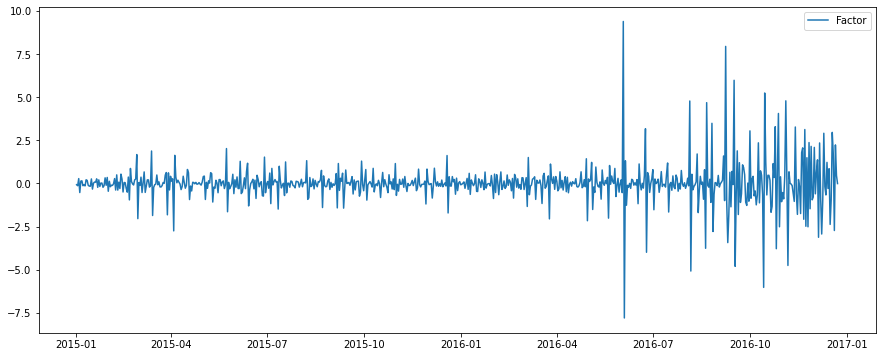

In [47]:
fig, ax = plt.subplots(figsize=(15,6))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()

# 경기침체 그래프 추가 (회색)
# start = '2015-01-02'
# end = '2016-12-23'
# rec = DataReader('USREC', 'fred', start=start, end=end)
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [ ]:
res.factors.filtered[0][517:521]

In [71]:
max(res.factors.filtered[0])

0.42312229663528544

In [25]:
endog.index

DatetimeIndex(['2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
               '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09',
               '2015-01-10', '2015-01-11',
               ...
               '2016-12-14', '2016-12-15', '2016-12-16', '2016-12-17',
               '2016-12-18', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23'],
              dtype='datetime64[ns]', name='Date', length=722, freq=None)

In [72]:
date_01 = endog.index[0:60]

In [73]:
factor_01 = res.factors.filtered[0][0:60]

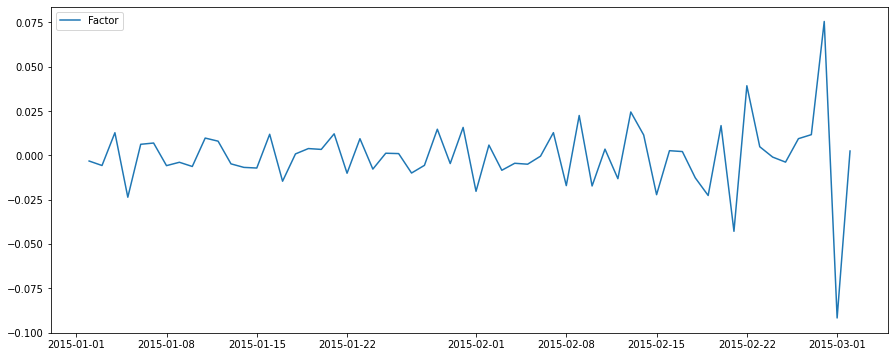

In [74]:
fig, ax = plt.subplots(figsize=(15,6))

dates = date_01
ax.plot(dates, factor_01, label='Factor')
ax.legend()

In [75]:
date_02 = endog.index[670:]

In [76]:
factor_02 = res.factors.filtered[0][670:]

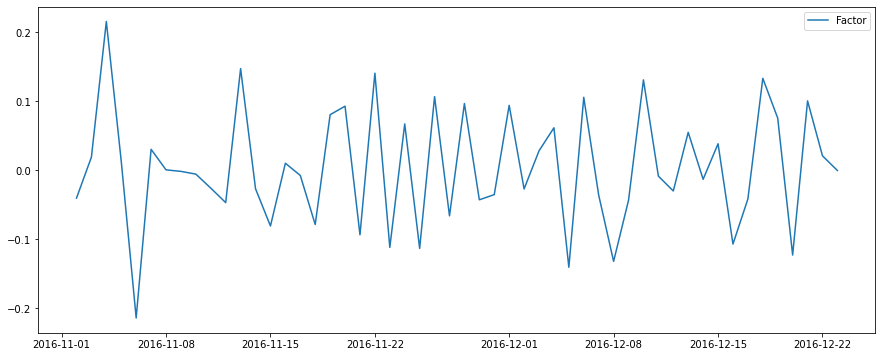

In [77]:
fig, ax = plt.subplots(figsize=(15,6))

dates = date_02
ax.plot(dates, factor_02, label='Factor')
ax.legend()

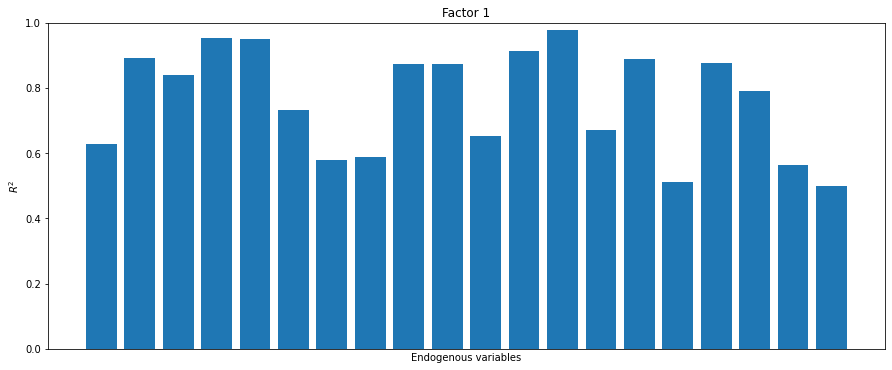

In [48]:
res.plot_coefficients_of_determination(figsize=(15,6));

/home/ekim_reverse/.local/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


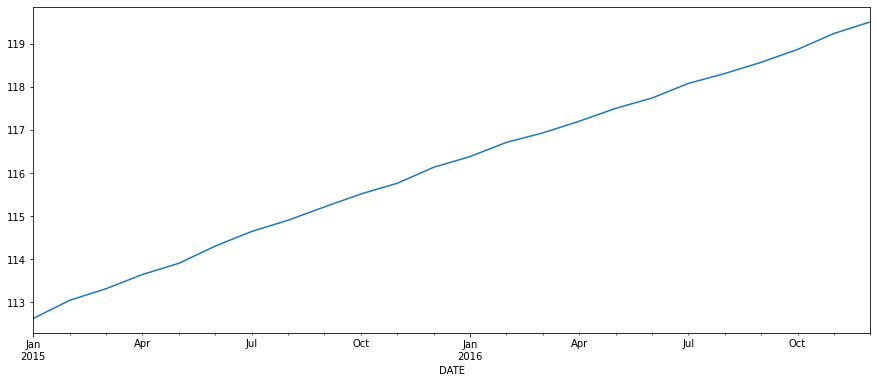

In [51]:
from pandas_datareader.data import DataReader
usphci = DataReader('USPHCI', 'fred', start='2015-01-01', end='2016-12-31')['USPHCI']
usphci.plot(figsize=(15,6));

In [49]:
def compute_coincident_index(mod, res):
    # Estimate W(1)
    spec = res.specification
    design = mod.ssm['design']
    transition = mod.ssm['transition']
    ss_kalman_gain = res.filter_results.kalman_gain[:,:,-1]  # kalman filter
    k_states = ss_kalman_gain.shape[0]

    W1 = np.linalg.inv(np.eye(k_states) - np.dot(
        np.eye(k_states) - np.dot(ss_kalman_gain, design),
        transition
    )).dot(ss_kalman_gain)[0]

    # Compute the factor mean vector
    factor_mean = np.dot(W1, dta_01.loc[:, 'topic0':'topic19'].mean())
    # Normalize the factors
    factor = res.factors.filtered[0]
    factor *= np.std(usphci.diff()[1:]) / np.std(factor)

    # Compute the coincident index
    coincident_index = np.zeros(mod.nobs+1)
#     The initial value is arbitrary; here it is set to
#     facilitate comparison
    coincident_index[0] = usphci.iloc[0] * factor_mean / dusphci.mean()
    for t in range(0, mod.nobs):
        coincident_index[t+1] = coincident_index[t] + factor[t] + factor_mean

    # Attach dates / Series
    coincident_index = pd.Series(coincident_index, index=dta.index).iloc[1:]

    # Normalize to use the same base year as USPHCI
    coincident_index *= (usphci.loc['2015-07-01'] / coincident_index.loc['2015-07-01'])

    return coincident_index

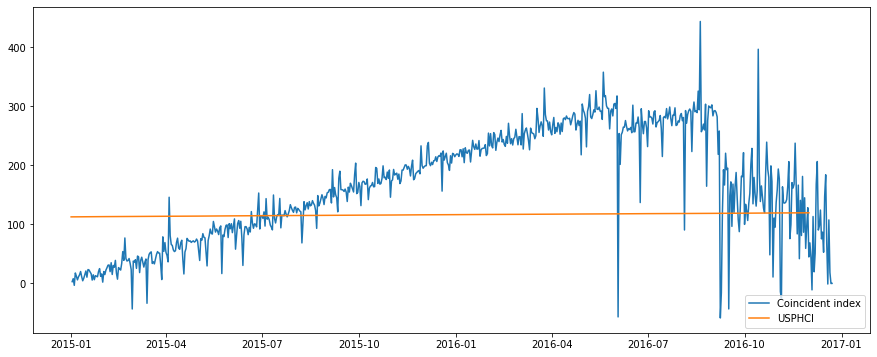

In [52]:
dusphci = usphci.diff()[1:].values
fig, ax = plt.subplots(figsize=(15,6))

# Compute the index
coincident_index = compute_coincident_index(mod, res)

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, coincident_index, label='Coincident index')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);

In [62]:
from statsmodels.tsa.statespace import tools
class ExtendedDFM(sm.tsa.DynamicFactor):
    def __init__(self, endog, **kwargs):
            # Setup the model as if we had a factor order of 4
            super(ExtendedDFM, self).__init__(
                endog, k_factors=1, factor_order=4, error_order=2,
                **kwargs)

            # Note: `self.parameters` is an ordered dict with the
            # keys corresponding to parameter types, and the values
            # the number of parameters of that type.
            # Add the new parameters
            self.parameters['new_loadings'] = 3

            # Cache a slice for the location of the 4 factor AR
            # parameters (a_1, ..., a_4) in the full parameter vector
            offset = (self.parameters['factor_loadings'] +
                      self.parameters['exog'] +
                      self.parameters['error_cov'])
            self._params_factor_ar = np.s_[offset:offset+2]
            self._params_factor_zero = np.s_[offset+2:offset+4]

    @property
    def start_params(self):
        # Add three new loading parameters to the end of the parameter
        # vector, initialized to zeros (for simplicity; they could
        # be initialized any way you like)
        return np.r_[super(ExtendedDFM, self).start_params, 0, 0, 0]

    @property
    def param_names(self):
        # Add the corresponding names for the new loading parameters
        #  (the name can be anything you like)
        return super(ExtendedDFM, self).param_names + [
            'loading.L%d.f1.%s' % (i, self.endog_names[3]) for i in range(1,4)]

    def transform_params(self, unconstrained):
            # Perform the typical DFM transformation (w/o the new parameters)
            constrained = super(ExtendedDFM, self).transform_params(
            unconstrained[:-3])

            # Redo the factor AR constraint, since we only want an AR(2),
            # and the previous constraint was for an AR(4)
            ar_params = unconstrained[self._params_factor_ar]
            constrained[self._params_factor_ar] = (
                tools.constrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[constrained, unconstrained[-3:]]

    def untransform_params(self, constrained):
            # Perform the typical DFM untransformation (w/o the new parameters)
            unconstrained = super(ExtendedDFM, self).untransform_params(
                constrained[:-3])

            # Redo the factor AR unconstrained, since we only want an AR(2),
            # and the previous unconstrained was for an AR(4)
            ar_params = constrained[self._params_factor_ar]
            unconstrained[self._params_factor_ar] = (
                tools.unconstrain_stationary_univariate(ar_params))

            # Return all the parameters
            return np.r_[unconstrained, constrained[-3:]]

    def update(self, params, transformed=True, **kwargs):
        # Peform the transformation, if required
        if not transformed:
            params = self.transform_params(params)
        params[self._params_factor_zero] = 0

        # Now perform the usual DFM update, but exclude our new parameters
        super(ExtendedDFM, self).update(params[:-3], transformed=True, **kwargs)

        # Finally, set our new parameters in the design matrix
        self.ssm['design', 3, 1:4] = params[-3:]

In [63]:
# Create the model
extended_mod = ExtendedDFM(endog)
initial_extended_res = extended_mod.fit(maxiter=1000, disp=False)
extended_res = extended_mod.fit(initial_extended_res.params, method='nm', maxiter=1000)

/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/ekim_reverse/.local/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
# print(extended_res.summary(separate_params=False))

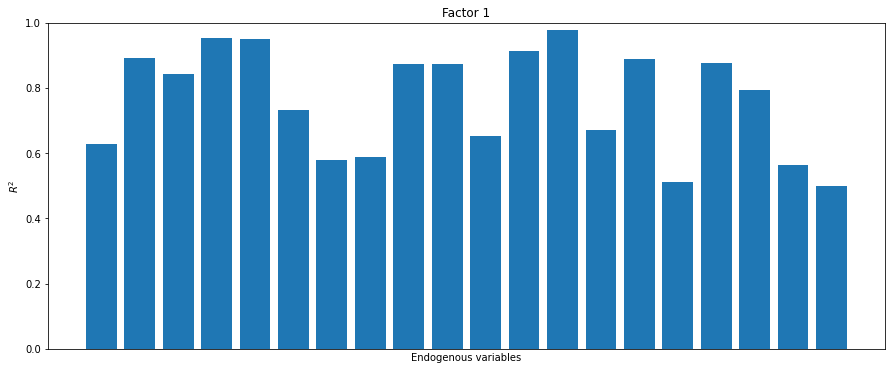

In [65]:
extended_res.plot_coefficients_of_determination(figsize=(15,6));

[Text(0.5, 1.0, 'Coincident indices, comparison')]

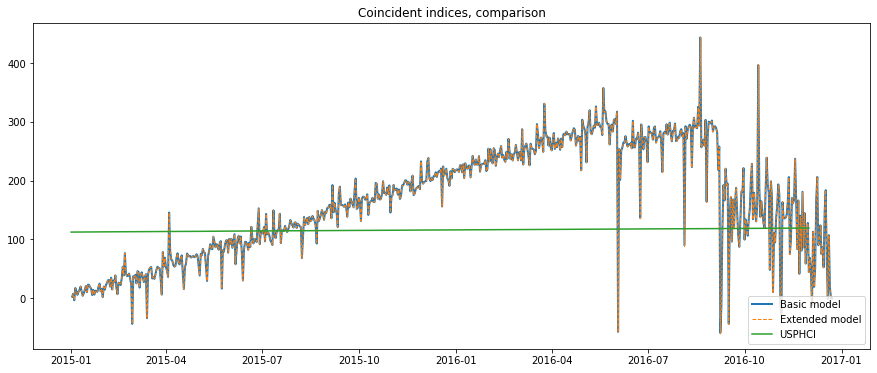

In [68]:
fig, ax = plt.subplots(figsize=(15,6))

# Compute the index
extended_coincident_index = compute_coincident_index(extended_mod, extended_res)

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, coincident_index, '-', linewidth=2, label='Basic model')
ax.plot(dates, extended_coincident_index, '--', linewidth=1, label='Extended model')
ax.plot(usphci.index._mpl_repr(), usphci, label='USPHCI')
ax.legend(loc='lower right')
ax.set(title='Coincident indices, comparison')

# Retrieve and also plot the NBER recession indicators
# ylim = ax.get_ylim()
# ax.fill_between(dates[:-3], ylim[0], ylim[1], rec.values[:-4,0], facecolor='k', alpha=0.1);